# Segundo examen parcial práctico

## Mitsiu Alejandro Carreño Sarabia - E23S-18014

En esta evaluación se tendrán los siguientes ejercicios, los cuales se deben seguir. Deben plasmar los resultados dentro de este mismo cuaderno y proporcionar tanto el código como la documentación necesaria para seguir completamente su proceso.

Se debe proporcionar este cuaderno, así como los archivos adicionales que se soliciten en las instrucciones.

Por favor, lee todas las instrucciones antes de comenzar.

## Perceptrón multicapa

Se debe entrenar un perceptrón multicapa siguiendo las siguientes instrucciones, ya que se evaluará sobre estos puntos:

1. Descarga y carga el conjunto de datos [Adult](https://archive.ics.uci.edu/dataset/2/adult).
2. Realiza la división del conjunto de datos en conjuntos de entrenamiento, prueba y validación si es necesario. Establece de manera explícita la selección de proporciones.
3. Realiza preprocesamiento de datos estándar, el cual puede incluir, pero no está limitado a, el tratamiento de variables categóricas, normalización y manejo de valores faltantes y atípicos.
4. Decide la arquitectura de la red, incluyendo el número de capas ocultas, el número de neuronas en cada capa y la función de activación en cada capa. Para esto, te puedes apoyar en experimentación en el punto 9.
5. Especifica los hiperparámetros principales de manera explícita para el diseño de la red, como, por ejemplo:
    - optimizador
    - función de pérdida
6. Diseña y aplica las distintas técnicas para prevenir el sobreentrenamiento.
    - Da tus conclusiones si los métodos fueron efectivos para evitar el sobreentrenamiento.
7. Entrena el modelo en el conjunto de entrenamiento.
   - Establece de manera explícita hiperparámetros de entrenamiento como el tamaño del lote y el número de épocas.
8. Evalúa el modelo en el conjunto de validación para obtener métricas de rendimiento. Realízalo con más de dos métricas.
9. Experimenta con diferentes hiperparámetros, realiza al menos 5 experimentos distintos.
   - Puedes usar técnicas como búsqueda en cuadrícula o búsqueda aleatoria para encontrar la mejor combinación de hiperparámetros.
   - **Nota**: hemos encontrado que keras autotuner no entrega los resultados esperados. Recomendaría no usarlo en este ejercicio.
10. Establece el modelo con mejor desempeño. Indica cuál es tu razonamiento para elegirlo.
   - Guarda el modelo para su uso futuro sin tener que volver a entrenarlo. Añade el archivo del modelo entrenado a los documentos de entrega.
11. Evalúa el modelo guardado usando los datos de prueba, utiliza más de 2 métricas y da tus conclusiones acerca del desempeño final del modelo.

El accuracy final del modelo (realizado por el profesor) influirá en la calificación final. Entrega el mejor modelo que puedas.


# Extra

Cumple el sueño frustrado de tu profesor y crea un modelo capaz de identificar el tipo primario de los Pokémon. Puedes utilizar el [Conjunto de Datos de Imágenes de Pokémon](https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types/data). Puedes emplear cualquier técnica o modelos preentrenados. Entrega el modelo y un pequeño script que muestre cómo realizar predicciones con él.

El nivel de precisión final definirá la cantidad de puntos adicionales sobre la calificación del examen; por ejemplo, un 80% de precisión equivale a 0.8 puntos extras.

Idea loca para tus noches de ocio: este modelo se podría utilizar para decidir cuál de dos Pokémon ganaría a partir de sus imágenes.

## 1. Descarga y carga el conjunto de datos [Adult](https://archive.ics.uci.edu/dataset/2/adult).

In [1]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Librerías necesarias
import numpy as np
import pandas as pd

In [3]:
# Descarga y carga de datos
from ucimlrepo import fetch_ucirepo

adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets

# Mostramos la información general del dataset
print(adult.metadata)

print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

### Exploración inicial de datos

In [4]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
X.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [7]:
pd.unique(y.values.reshape(48842,))

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

## 2. Realiza la división del conjunto de datos en conjuntos de entrenamiento, prueba y validación si es necesario. Establece de manera explícita la selección de proporciones.

In [8]:
# Opte por realizar algunas operaciones de preprocesamiento antes de realizar la división, esta sección esta más abajo :)

## 3. Realiza preprocesamiento de datos estándar, el cual puede incluir, pero no está limitado a, el tratamiento de variables categóricas, normalización y manejo de valores faltantes y atípicos.

### Procesamiento de nulos 

In [9]:
X.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [10]:
# Los valores nulos representan poco menos del 5% de nuestros datos por lo que creo que es una opción eliminarlos para que no afecten los datos reales
df_merged = pd.concat([X, y], axis=1)
df_merged.dropna(inplace=True)
print(df_merged.isna().sum())
print(df_merged.shape)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
(47621, 15)


### Preprocesamiento de target 
Aunque target tiene 4 posibles valores ['<=50K', '>50K', '<=50K.', '>50K.'], en realidad estan duplicados, y nos conviene más tenerlos como valores númericos

In [11]:
print(df_merged.groupby('income')["income"].count())
df_merged['income'] = np.where((df_merged['income'] == '<=50K') |  (df_merged['income'] == '<=50K.'), 0, 1)
print(df_merged.groupby('income')["income"].count())

income
<=50K     24720
<=50K.    11360
>50K       7841
>50K.      3700
Name: income, dtype: int64
income
0    36080
1    11541
Name: income, dtype: int64


### Validando duplicidad de education y education-num

In [12]:
# Ambas columnas tienen exactamente la misma distribución por lo que no representan datos nuevos
print(df_merged.groupby('education')['education'].count().sort_values())
print(df_merged.groupby('education-num')['education-num'].count().sort_values())

education
Preschool          78
1st-4th           239
5th-6th           494
Doctorate         582
12th              633
9th               735
Prof-school       819
7th-8th           912
10th             1336
Assoc-acdm       1566
11th             1746
Assoc-voc        2034
Masters          2610
Bachelors        7881
Some-college    10512
HS-grad         15444
Name: education, dtype: int64
education-num
1        78
2       239
3       494
16      582
8       633
5       735
15      819
4       912
6      1336
12     1566
7      1746
11     2034
14     2610
13     7881
10    10512
9     15444
Name: education-num, dtype: int64


### Tratamiento de valores categóricos

(Legacy pero lo dejo por razónes de aprendizaje)Todas nuestras variables de tipo object son categorías, por lo que podemos convertirlas en categorías numéricas

¿Qué hacía el código de abajo y porque lo marqué legacy? Convertía las categorías en números (ej, Sexo Hombre, Mujer ===> Sexo 0, 1) 
Aunque ambos representan lo mismo, una categoría, cuando se normaliza puede cambiarlo (0.7) lo cuál no es correcto, y produce errores en la red neuronal

Investigando encontré este articulo: https://towardsdatascience.com/an-overview-of-categorical-input-handling-for-neural-networks-c172ba552dee
En el comentan que la solución defacto es aplicar el one_hot encoding (pd.get_dummies()) pero inclusó va más allá y propone un tratamiento para los valores ordinales "Difference Coding" lo cuál me parece una opción muy interesante para investigacíon posterior. 

In [13]:
'''
categ_columns = df_merged.select_dtypes(['object']).columns

categ_dict = dict()

for col in categ_columns:
    #print(df_merged.groupby(col)[col].count())

    categ_dict[col] = dict( enumerate(pd.Categorical(df_merged[col]).categories ))
    
    df_merged[col] = pd.Categorical(df_merged[col]).codes
    #print(df_merged.groupby(col)[col].count())
    #print("-"*20)
'''

'\ncateg_columns = df_merged.select_dtypes([\'object\']).columns\n\ncateg_dict = dict()\n\nfor col in categ_columns:\n    #print(df_merged.groupby(col)[col].count())\n\n    categ_dict[col] = dict( enumerate(pd.Categorical(df_merged[col]).categories ))\n    \n    df_merged[col] = pd.Categorical(df_merged[col]).codes\n    #print(df_merged.groupby(col)[col].count())\n    #print("-"*20)\n'

Determinando las columnas a aplicar one_hot encoding

In [14]:

import pprint

categ_columns = df_merged.select_dtypes(['object']).columns

categ_dict = dict()

for col in categ_columns:

    categ_dict[col] = dict( enumerate(pd.Categorical(df_merged[col]).categories ))
    
pprint.pprint(categ_dict)


{'education': {0: '10th',
               1: '11th',
               2: '12th',
               3: '1st-4th',
               4: '5th-6th',
               5: '7th-8th',
               6: '9th',
               7: 'Assoc-acdm',
               8: 'Assoc-voc',
               9: 'Bachelors',
               10: 'Doctorate',
               11: 'HS-grad',
               12: 'Masters',
               13: 'Preschool',
               14: 'Prof-school',
               15: 'Some-college'},
 'marital-status': {0: 'Divorced',
                    1: 'Married-AF-spouse',
                    2: 'Married-civ-spouse',
                    3: 'Married-spouse-absent',
                    4: 'Never-married',
                    5: 'Separated',
                    6: 'Widowed'},
 'native-country': {0: '?',
                    1: 'Cambodia',
                    2: 'Canada',
                    3: 'China',
                    4: 'Columbia',
                    5: 'Cuba',
                    6: 'Dominican-Republic',


Podemos observar las distintas clases y determinar cuales categorías vamos a entrenar, en este caso todas las variables categoricas nominales se les aplicó un tratamiento one-hot encoding.        
La variable education por ser categorica ordinal, y tener una coorespondencia 1 a 1 con education-num podemos ignrorarla y tomar la númerica ordenada.       
Respecto al pais, dada la cantidad de opciones, puede generalizarse en continente y reducir la cantidad de opciones, pero por cuestiones de tiempo no creo alcanzar a hacer el cruce de paises con sus continentes, una opción más económica es dividir entre si es de estados unidos o no.

In [15]:
one_hot = pd.get_dummies(df_merged[['workclass', 'sex', 'race', 'relationship', 'occupation', 'marital-status']])

df_merged = df_merged.drop('workclass',axis = 1)
df_merged = df_merged.drop('sex',axis = 1)
df_merged = df_merged.drop('race',axis = 1)
df_merged = df_merged.drop('relationship',axis = 1)
df_merged = df_merged.drop('occupation',axis = 1)
df_merged = df_merged.drop('marital-status',axis = 1)
df_merged = df_merged.drop('native-country', axis = 1)

df_merged = df_merged.join(one_hot)

In [16]:
df_merged.dtypes

age                                      int64
fnlwgt                                   int64
education                               object
education-num                            int64
capital-gain                             int64
capital-loss                             int64
hours-per-week                           int64
income                                   int64
workclass_?                              uint8
workclass_Federal-gov                    uint8
workclass_Local-gov                      uint8
workclass_Never-worked                   uint8
workclass_Private                        uint8
workclass_Self-emp-inc                   uint8
workclass_Self-emp-not-inc               uint8
workclass_State-gov                      uint8
workclass_Without-pay                    uint8
sex_Female                               uint8
sex_Male                                 uint8
race_Amer-Indian-Eskimo                  uint8
race_Asian-Pac-Islander                  uint8
race_Black   

In [17]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


Retomamos la división de set de entrenamiento y validación

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
features = df_merged.columns
features = features.drop(adult.metadata.target_col)
features = features.drop("education")
features

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'sex_Female',
       'sex_Male', 'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander',
       'race_Black', 'race_Other', 'race_White', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupati

In [20]:
# Test size de 2 a 3 porque val_loss por debajo de loss
x_train, x_test, y_train, y_test = train_test_split(df_merged[features], df_merged[adult.metadata.target_col], test_size=0.2)
x_train.shape

(38096, 50)

Finalmente con los datasets generados podemos Normalizar los valores

In [21]:
# Estandarizado de datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


## 4. Decide la arquitectura de la red, incluyendo el número de capas ocultas, el número de neuronas en cada capa y la función de activación en cada capa. Para esto, te puedes apoyar en experimentación en el punto 9.

El problema se trata de clasificación, queremos predecir si una persona va a ganar más de 50k al año o no, por lo que nuestra capa de salida será sigmoidea, con una sola neurona.
Elegí una capa oculta con activación relu dado que es de las funciones más comúnes y elegí 24 neuronas partiendo de que el dataset original tenía 14 features (cerca del doble), pero después de aplicar el one_hot encoding mi número de featrues crecio a 50 pero mantuve las 24 por estar cerca de la mitad

In [22]:
from tensorflow import keras

2023-10-22 14:01:07.152185: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-22 14:01:07.186790: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-22 14:01:07.186826: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-22 14:01:07.186844: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-22 14:01:07.192564: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-22 14:01:07.193458: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [23]:
model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(24, activation="relu"),
    # Prevención de sobre-entrenamiento
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])

## 5. Especifica los hiperparámetros principales de manera explícita para el diseño de la red, como, por ejemplo:
    - optimizador
    - función de pérdida

Al tratarse de un problema de clasificación binaria, elegí la función de perdida binary_crossentropy con optimizador Adam ya que me convenía usar un el gradiente estocástico y también es de los más implementados. Para las metricas decidí agregar falsos negativos y positivos.

In [24]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', keras.metrics.FalsePositives(), keras.metrics.FalseNegatives()])

## 6. Diseña y aplica las distintas técnicas para prevenir el sobreentrenamiento.
    - Da tus conclusiones si los métodos fueron efectivos para evitar el sobreentrenamiento.

Apliqué una capa de dropout (ver código de sección 4) con un 20 porciento, antes de ello sin capa de dropout pude percibir que cuando agregué la capa de dropout las diferencias entre accuracy y loss disminuyeron, siendo más parecidos entre si.

## 7. Entrena el modelo en el conjunto de entrenamiento.
   - Establece de manera explícita hiperparámetros de entrenamiento como el tamaño del lote y el número de épocas.

In [25]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=80, verbose=False)

## 8. Evalúa el modelo en el conjunto de validación para obtener métricas de rendimiento. Realízalo con más de dos métricas.

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_false_positives', 'val_false_negatives'])

loss


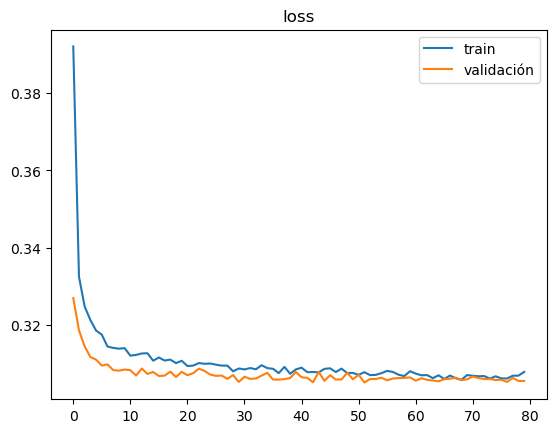

accuracy


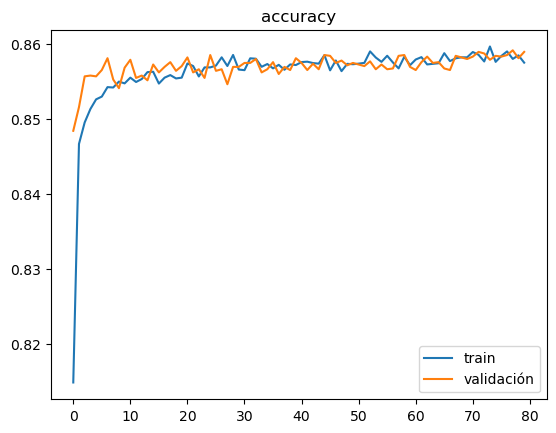

false_positives


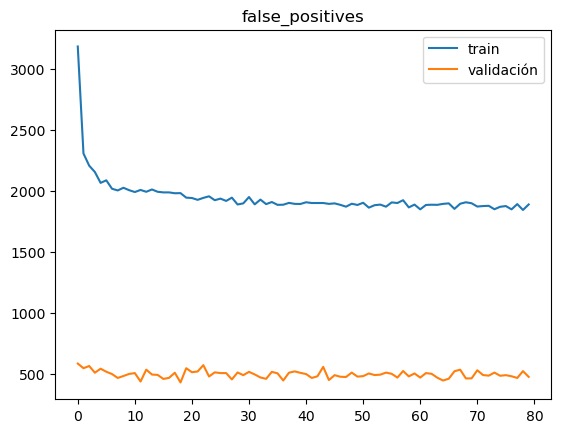

false_negatives


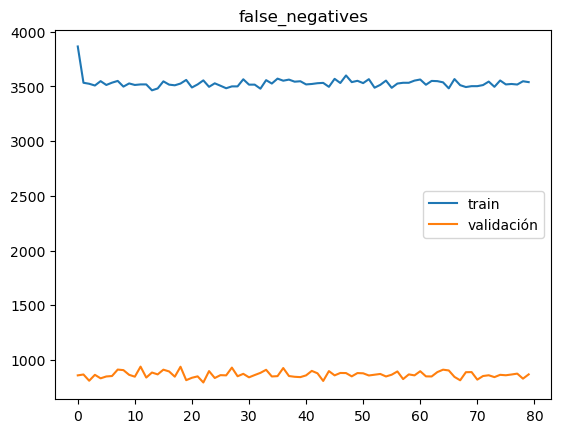

In [27]:
import matplotlib.pyplot as plt

def plotHistory(train_values, val_values, title):
    plt.title(title)
    #plt.semilogy(train_values, label="train")
    plt.plot(train_values, label="train")
    plt.plot(val_values, label="validación")
    plt.legend()
    plt.show()

for key in [k  for k in history.history.keys() if k.startswith('val_') == False]:
    print(key)
    plotHistory(history.history[key], history.history["val_"+key], key )
    


In [28]:
test_loss, test_accuracy, f_pos, f_neg = model.evaluate(x_test, y_test)

print(f"Perdida test: {test_loss:.4f}")
print(f"Precision test: {test_accuracy * 100 :.2f}%")
print(f"Falsos positivos: {f_pos} == {f_pos/x_test.shape[0] * 100:.2f}%")
print(f"Falsos negativos: {f_neg} == {f_neg/x_test.shape[0] * 100:.2f}%")

298/298 [==============================] - 1s 2ms/step - loss: 0.3054 - accuracy: 0.8589 - false_positives: 477.0000 - false_negatives: 867.0000
Perdida test: 0.3054
Precision test: 85.89%
Falsos positivos: 477.0 == 5.01%
Falsos negativos: 867.0 == 9.10%


## 9. Experimenta con diferentes hiperparámetros, realiza al menos 5 experimentos distintos.
   - Puedes usar técnicas como búsqueda en cuadrícula o búsqueda aleatoria para encontrar la mejor combinación de hiperparámetros.
   - **Nota**: hemos encontrado que keras autotuner no entrega los resultados esperados. Recomendaría no usarlo en este ejercicio.

### Variante 2
Aumentamos la cantidad de neuronas en la primera capa (de 24 a 50) y aumentamos la cantidad de dropout de 20% a 35% 

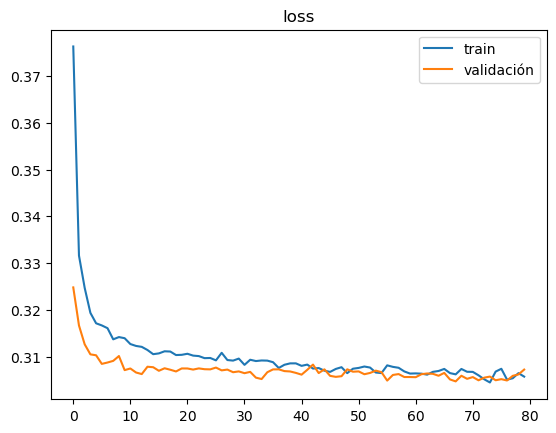

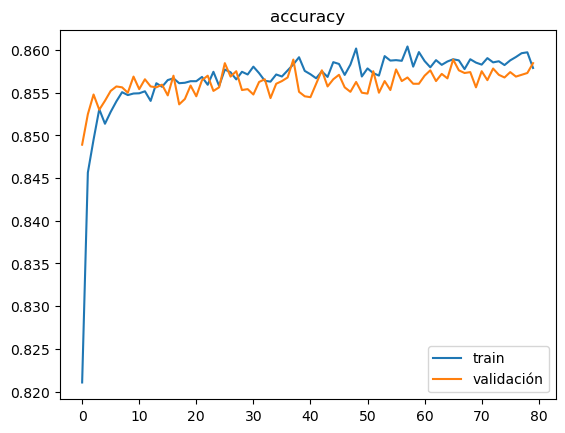

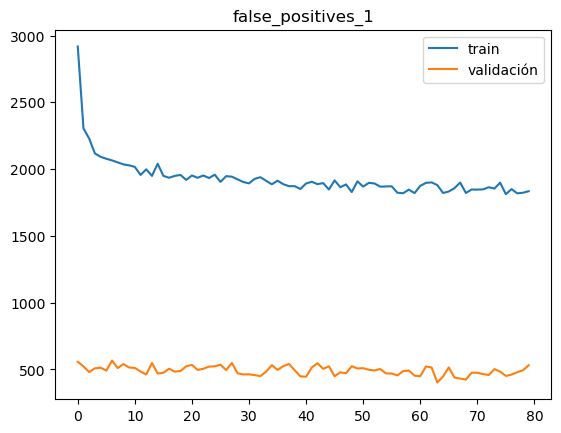

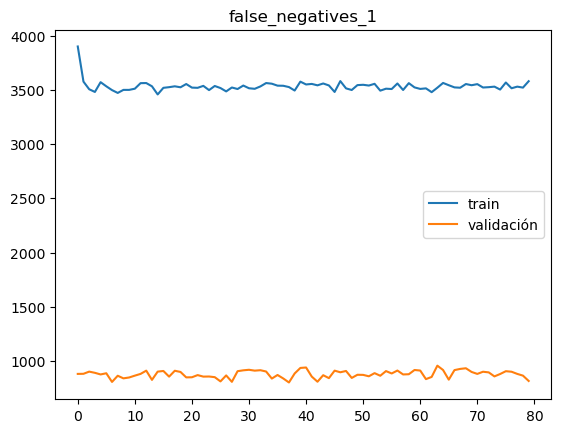

298/298 [==============================] - 1s 2ms/step - loss: 0.3072 - accuracy: 0.8585 - false_positives_1: 531.0000 - false_negatives_1: 817.0000
Perdida test: 0.3072
Precision test: 85.85%
Falsos positivos: 531.0 == 5.57%
Falsos negativos: 817.0 == 8.58%


In [29]:
v1 = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(1, activation="sigmoid")
])

v1.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', keras.metrics.FalsePositives(), keras.metrics.FalseNegatives()])

v1_history = v1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=80, verbose=False)


for key in [k  for k in v1_history.history.keys() if k.startswith('val_') == False]:
    plotHistory(v1_history.history[key], v1_history.history["val_"+key], key )

v1_test_loss, v1_test_accuracy, v1_f_pos, v1_f_neg = v1.evaluate(x_test, y_test)

print(f"Perdida test: {v1_test_loss:.4f}")
print(f"Precision test: {v1_test_accuracy * 100 :.2f}%")
print(f"Falsos positivos: {v1_f_pos} == {v1_f_pos/x_test.shape[0] * 100:.2f}%")
print(f"Falsos negativos: {v1_f_neg} == {v1_f_neg/x_test.shape[0] * 100:.2f}%")

### Variante 3 
Aplicamos regularizadores a ambas capas

loss


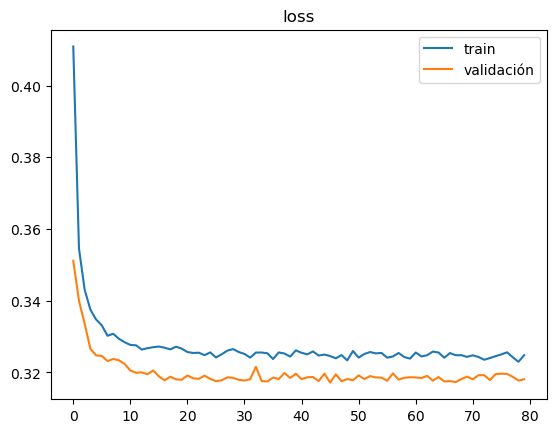

accuracy


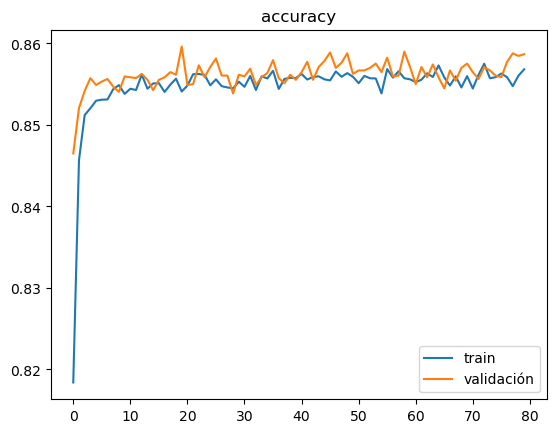

false_positives_2


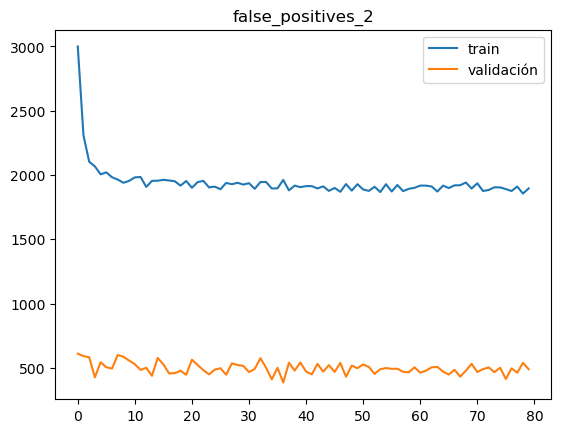

false_negatives_2


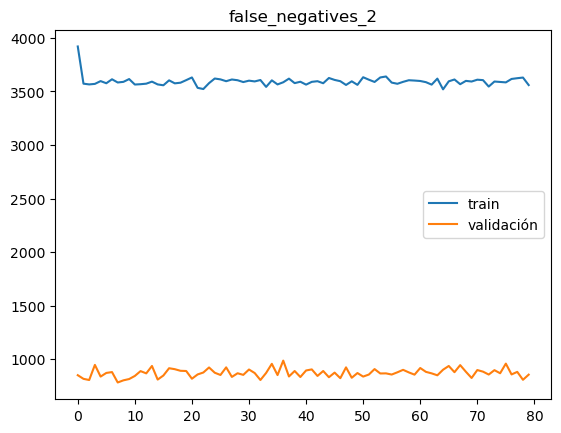

298/298 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8587 - false_positives_2: 489.0000 - false_negatives_2: 857.0000
Perdida test: 0.3181
Precision test: 85.87%
Falsos positivos: 489.0 == 5.13%
Falsos negativos: 857.0 == 9.00%


In [30]:
v2 = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(50, activation="relu", kernel_regularizer = keras.regularizers.L1(1e-4), bias_regularizer = keras.regularizers.L2(1e-4)),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(1, activation="sigmoid", kernel_regularizer = keras.regularizers.L1(1e-4), bias_regularizer = keras.regularizers.L2(1e-4))
])

v2.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', keras.metrics.FalsePositives(), keras.metrics.FalseNegatives()])

v2_history = v2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=80, verbose=False)


for key in [k  for k in v2_history.history.keys() if k.startswith('val_') == False]:
    print(key)
    plotHistory(v2_history.history[key], v2_history.history["val_"+key], key )

v2_test_loss, v2_test_accuracy, v2_f_pos, v2_f_neg = v2.evaluate(x_test, y_test)

print(f"Perdida test: {v2_test_loss:.4f}")
print(f"Precision test: {v2_test_accuracy * 100 :.2f}%")
print(f"Falsos positivos: {v2_f_pos} == {v2_f_pos/x_test.shape[0] * 100:.2f}%")
print(f"Falsos negativos: {v2_f_neg} == {v2_f_neg/x_test.shape[0] * 100:.2f}%")

### Variante 4
Agregamos otra capa oculta

loss


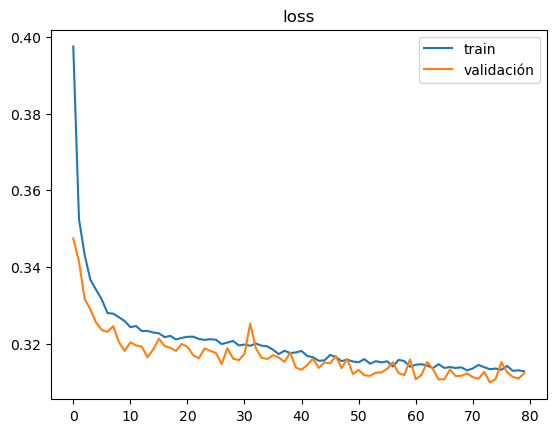

accuracy


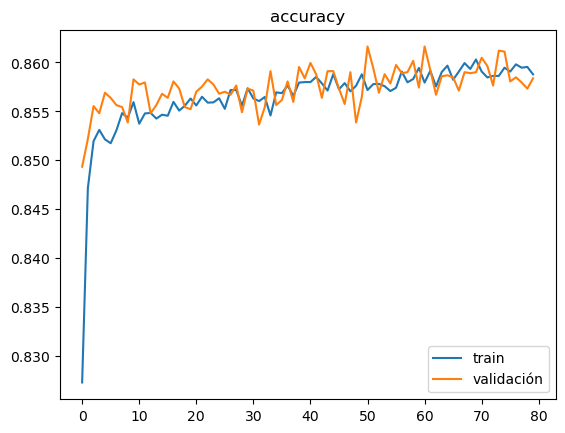

false_positives_3


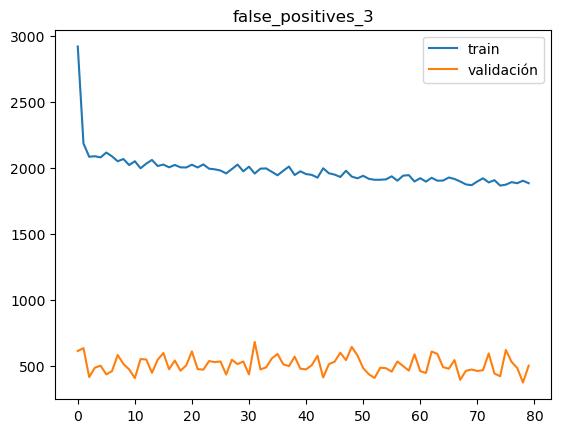

false_negatives_3


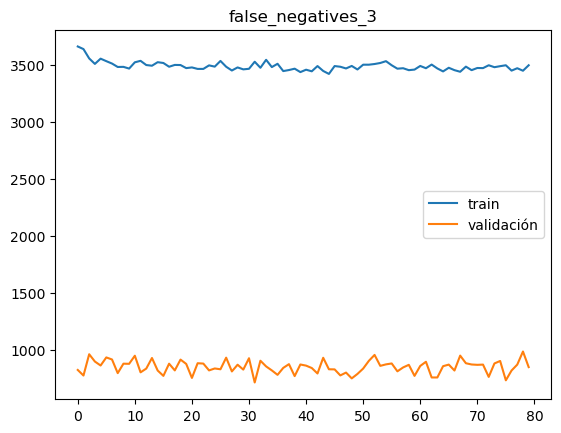

298/298 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8584 - false_positives_3: 503.0000 - false_negatives_3: 846.0000
Perdida test: 0.3122
Precision test: 85.84%
Falsos positivos: 503.0 == 5.28%
Falsos negativos: 846.0 == 8.88%


In [31]:
v3 = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(50, activation="linear", kernel_regularizer = keras.regularizers.L1(1e-4), bias_regularizer = keras.regularizers.L2(1e-4)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(24, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid", kernel_regularizer = keras.regularizers.L1(1e-4), bias_regularizer = keras.regularizers.L2(1e-4))
])

v3.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', keras.metrics.FalsePositives(), keras.metrics.FalseNegatives()])

v3_history = v3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=80, verbose=False)


for key in [k  for k in v3_history.history.keys() if k.startswith('val_') == False]:
    print(key)
    plotHistory(v3_history.history[key], v3_history.history["val_"+key], key )

v3_test_loss, v3_test_accuracy, v3_f_pos, v3_f_neg = v3.evaluate(x_test, y_test)

print(f"Perdida test: {v3_test_loss:.4f}")
print(f"Precision test: {v3_test_accuracy * 100 :.2f}%")
print(f"Falsos positivos: {v3_f_pos} == {v3_f_pos/x_test.shape[0] * 100:.2f}%")
print(f"Falsos negativos: {v3_f_neg} == {v3_f_neg/x_test.shape[0] * 100:.2f}%")

### Variante 5
Modificamos nuestras funciones de perdida y optimización, así como la función de activación de la última capa

loss


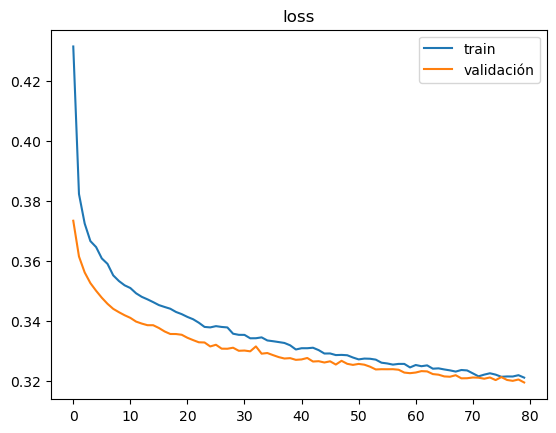

accuracy


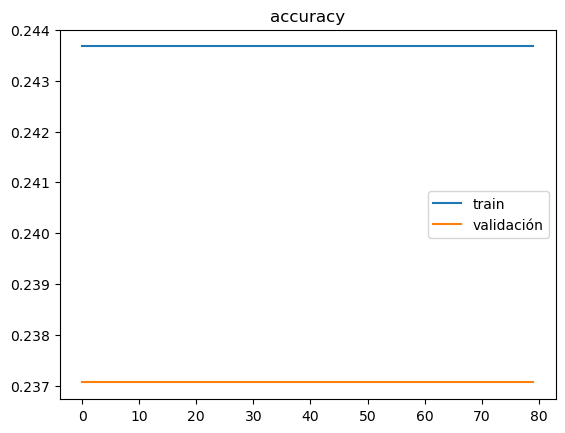

false_positives_4


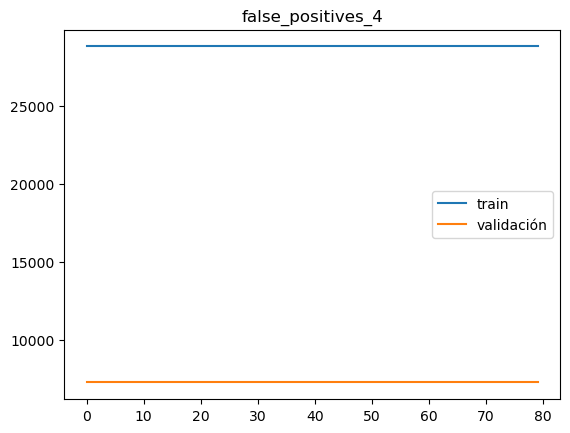

false_negatives_4


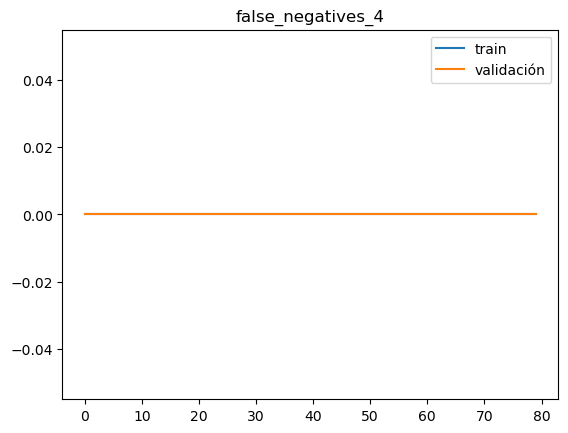

298/298 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.2371 - false_positives_4: 7267.0000 - false_negatives_4: 0.0000e+00
Perdida test: 0.3194
Precision test: 23.71%
Falsos positivos: 7267.0 == 76.29%
Falsos negativos: 0.0 == 0.00%


In [32]:
v4 = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(50, activation="linear", kernel_regularizer = keras.regularizers.L1(1e-4), bias_regularizer = keras.regularizers.L2(1e-4)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(24, activation="relu"),
    keras.layers.Dense(1, activation="softmax", kernel_regularizer = keras.regularizers.L1(1e-4), bias_regularizer = keras.regularizers.L2(1e-4))
])

v4.compile(loss="binary_crossentropy", optimizer="SGD", metrics=['accuracy', keras.metrics.FalsePositives(), keras.metrics.FalseNegatives()])

v4_history = v4.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=80, verbose=False)


for key in [k  for k in v4_history.history.keys() if k.startswith('val_') == False]:
    print(key)
    plotHistory(v4_history.history[key], v4_history.history["val_"+key], key )

v4_test_loss, v4_test_accuracy, v4_f_pos, v4_f_neg = v4.evaluate(x_test, y_test)

print(f"Perdida test: {v4_test_loss:.4f}")
print(f"Precision test: {v4_test_accuracy * 100 :.2f}%")
print(f"Falsos positivos: {v4_f_pos} == {v4_f_pos/x_test.shape[0] * 100:.2f}%")
print(f"Falsos negativos: {v4_f_neg} == {v4_f_neg/x_test.shape[0] * 100:.2f}%")

## 10. Establece el modelo con mejor desempeño. Indica cuál es tu razonamiento para elegirlo.
   - Guarda el modelo para su uso futuro sin tener que volver a entrenarlo. Añade el archivo del modelo entrenado a los documentos de entrega.

Comparando la precisión, perdida y falsos negativos y positivos, apoyado de las gráficas de la sección anterior es fácil descartar la 5ª variante, ya que no esta logrando clasificar nada. Respecto al resto de los modelos es un poco más reñido, ya que en general tienen valores muy similares, pero creo que el mejor fue el modelo inicial que ofrece prestaciones minimamente superiores en precisión a costa de aumentar los falsos negativos; creo que sabiendo el contexto del analisis y para que se usaría, puede marcar tendencias sobre que es más favorable, falsos negativos o falsos positivos.

In [33]:
print("-"*10,"MODELO ORIGINAL","-"*10,)
print(f"Perdida test: {test_loss:.4f}")
print(f"Precision test: {test_accuracy * 100 :.2f}%")
print(f"Falsos positivos: {f_pos} == {f_pos/x_test.shape[0] * 100:.2f}%")
print(f"Falsos negativos: {f_neg} == {f_neg/x_test.shape[0] * 100:.2f}%")
#model.summary()

print();
print("-"*10,"Variante 2","-"*10,)
print(f"Perdida test: {v1_test_loss:.4f}")
print(f"Precision test: {v1_test_accuracy * 100 :.2f}%")
print(f"Falsos positivos: {v1_f_pos} == {v1_f_pos/x_test.shape[0] * 100:.2f}%")
print(f"Falsos negativos: {v1_f_neg} == {v1_f_neg/x_test.shape[0] * 100:.2f}%")

print();
print("-"*10,"Variante 3","-"*10,)
print(f"Perdida test: {v2_test_loss:.4f}")
print(f"Precision test: {v2_test_accuracy * 100 :.2f}%")
print(f"Falsos positivos: {v2_f_pos} == {v2_f_pos/x_test.shape[0] * 100:.2f}%")
print(f"Falsos negativos: {v2_f_neg} == {v2_f_neg/x_test.shape[0] * 100:.2f}%")

print();
print("-"*10,"Variante 4","-"*10,)
print(f"Perdida test: {v3_test_loss:.4f}")
print(f"Precision test: {v3_test_accuracy * 100 :.2f}%")
print(f"Falsos positivos: {v3_f_pos} == {v3_f_pos/x_test.shape[0] * 100:.2f}%")
print(f"Falsos negativos: {v3_f_neg} == {v3_f_neg/x_test.shape[0] * 100:.2f}%")

print();
print("-"*10,"Variante 5","-"*10,)
print(f"Perdida test: {v4_test_loss:.4f}")
print(f"Precision test: {v4_test_accuracy * 100 :.2f}%")
print(f"Falsos positivos: {v4_f_pos} == {v4_f_pos/x_test.shape[0] * 100:.2f}%")
print(f"Falsos negativos: {v4_f_neg} == {v4_f_neg/x_test.shape[0] * 100:.2f}%")

---------- MODELO ORIGINAL ----------
Perdida test: 0.3054
Precision test: 85.89%
Falsos positivos: 477.0 == 5.01%
Falsos negativos: 867.0 == 9.10%

---------- Variante 1 ----------
Perdida test: 0.3072
Precision test: 85.85%
Falsos positivos: 531.0 == 5.57%
Falsos negativos: 817.0 == 8.58%

---------- Variante 2 ----------
Perdida test: 0.3181
Precision test: 85.87%
Falsos positivos: 489.0 == 5.13%
Falsos negativos: 857.0 == 9.00%

---------- Variante 3 ----------
Perdida test: 0.3122
Precision test: 85.84%
Falsos positivos: 503.0 == 5.28%
Falsos negativos: 846.0 == 8.88%

---------- Variante 4 ----------
Perdida test: 0.3122
Precision test: 85.84%
Falsos positivos: 503.0 == 5.28%
Falsos negativos: 846.0 == 8.88%


In [36]:
# Save the entire model as a `.keras` zip archive.
model.save('s11_adult_carreno.keras')


## 11. Evalúa el modelo guardado usando los datos de prueba, utiliza más de 2 métricas y da tus conclusiones acerca del desempeño final del modelo.

En general los modelos muestran un desempeño muy similar entre si, creo que esto se debe a que la red neuronal esta optimizando cerca del límite posible o porque esta atorada en un optimo local. Creo que el preprocesamiento que se dio a los datos fue el adecuado, con ciertos puntos de mejora posibles claro esta. Finalmente agregar los falsos positivos y negativos abrió un poco el panorama para poder elegir un modelo sobre el resto.

In [37]:
new_model = keras.models.load_model('s11_adult_carreno.keras')

new_model.summary()


loss, acc, f_pos, f_neg = new_model.evaluate(x_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(x_test).shape)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                1224      
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1249 (4.88 KB)
Trainable params: 1249 (4.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
298/298 - 1s - loss: 0.3054 - accuracy: 0.8589 - false_positives: 477.0000 - false_negatives: 867.0000 - 624ms/epoch - 2ms/step
Restored model, accuracy: 85.89%
298/298 [==============================] - 0s 1ms/step
(9525, 1)
